(100, 1)
(100, 2)
(100, 1)


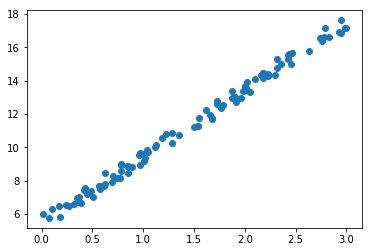

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 1. tạo data
# số lượng sample
m = 100

# X chứa data 
X = 3*np.random.rand(m, 1)

# X_b chứa thêm bias (=1)
X_b = np.c_[np.ones((m, 1)), X]

# tạo label
y = 5 + 4*X + np.random.rand(m, 1)

print(X.shape)
print(X_b.shape)
print(y.shape)

plt.scatter(X, y)
plt.show()

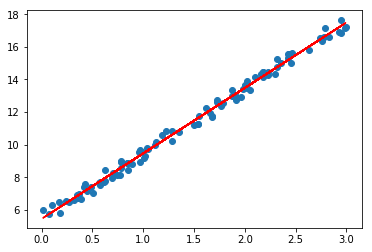

In [31]:
def learning_schedule(t, t0, t1):
    return t0/(t+t1)

def stochastic_gradient_descent():
    n_epochs = 50
    t0, t1 = 5, 50
    thetas = np.random.randn(2, 1)
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(m):
            # lấy ngẫu nhiên 1 sample
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # tính output (o = x1*w1 + x2*w2)
            oi = xi.dot(thetas)
            
            # tính loss li [l = (output - y)^2]
            li = (oi - yi)*(oi - yi) / 2
            
            # tính gradient cho loss
            g_li = (oi - yi)
            
            # tính gradient (g_x1 = x1*g_li) va (g_x2 = x2*g_li)
            gradients = xi.T.dot(g_li)
            
            # tính learning rate cho mỗi sample
            eta = learning_schedule(epoch*m + i, t0, t1)
            
            # update giá trị theta
            thetas = thetas - eta*gradients
            
            # logging
            thetas_path.append(thetas)            
            losses.append(li[0][0])

    return thetas_path, losses

bgd_thetas, losses = np.array(stochastic_gradient_descent())

plt.scatter(X, y)
data_y = X*bgd_thetas[-1][1]+ bgd_thetas[-1][0]
plt.plot(X,data_y, color="r")
plt.show()

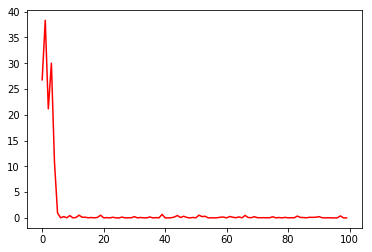

In [32]:
# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()